In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 24 18:54:14 2018

@author: zhangjuefei
"""

from book_draw_util import *

fig = plt.figure(figsize=SQUARE_FIG_SIZE, facecolor='white')
ax = Axes3D(fig)
# ax.axis("off")
ax.clear()


ax.set_xlim([-6, 6], emit=False)
ax.set_ylim([-6, 6])
# ax.set_zlim([0, 1])

# ax.set_title(r"$Lorenz\ Attractor$")
ax.set_xlabel(r"$x_1$", fontsize=AXIS_LABEL_FONT_SIZE)
ax.set_ylabel(r"$x_2$", fontsize=AXIS_LABEL_FONT_SIZE)
ax.set_zlabel(r"$y$", fontsize=AXIS_LABEL_FONT_SIZE)

def f(x1, x2):
    global w
    return 0.02 * (w[0] * x1 + w[1] * x2) ** 2

w = (1.5, 1.5)
arrow = Arrow3D([0, w[0]],[0, w[1]],[0,0], arrowstyle="-|>", lw=1, mutation_scale=10, color="black")
ax.add_artist(arrow)
ax.text(w[0], w[1], 0.05, r"$w$", fontsize=TEXT_FONT_SIZE)
ax.plot((-6, 6), (-6, 6), (0, 0), "k--", alpha=ALPHA)

arrow = Arrow3D([0,4],[0,0],[0,0], arrowstyle="-|>", lw=1, mutation_scale=10, color="black")
ax.add_artist(arrow)
ax.text(4.1, 0, 0, r"$x_a$", fontsize=TEXT_FONT_SIZE)

arrow = Arrow3D([0,6],[0,-2],[0,0], arrowstyle="-|>", lw=1, mutation_scale=10, color="black")
ax.add_artist(arrow)
ax.text(5.9, -1.9, 0, r"$x_b$", fontsize=TEXT_FONT_SIZE)

ax.plot((6.5, -1.5), (-2.5, 5.5), (0, 0), "k--", alpha=ALPHA)

ax.text(2, 2, 1.5 * f(2,2), r"$f\left(x\right)=0.02\times\left(w^\mathrm{T}x\right)^2$", fontsize=TEXT_FONT_SIZE)

x1 = np.linspace(-6, 6, endpoint=True, num=40)
x2 = np.linspace(-6, 6, endpoint=True, num=40)
x3 = f(x1, x2)
ax.plot(x1, x2, x3, "k", alpha=ALPHA)

x1, x2 = np.meshgrid(x1, x2)
x1, x2 = x1.flatten(), x2.flatten()
x3 = f(x1, x2)
tri = mtri.Triangulation(x1, x2)
ax.plot_trisurf(x1, x2, x3, antialiased=True, alpha=LIGHT_ALPHA, color="black")

ax.scatter(0, 0, 0, s=SMALL_POINT_SIZE, c="k")
ax.scatter(2, 2,0 , s=SMALL_POINT_SIZE, c="k")
ax.scatter(2, 2,f(2, 2) , s=SMALL_POINT_SIZE, c="k")
ax.plot(np.linspace(2, 2, endpoint=True, num=40)
, np.linspace(2, 2, endpoint=True, num=40), np.linspace(0, f(2, 2), endpoint=True, num=40), "k--", alpha=ALPHA)

points = np.random.multivariate_normal((3,3), [[0.3,0],[0,0.3]], 20)
ax.scatter(points[:,0],points[:,1],[0] * 20,  color="k", s=BIG_POINT_SIZE)

points = np.random.multivariate_normal((-3,3), [[0.3,0],[0,0.3]], 20)
ax.scatter(points[:,0],points[:,1],[0] * 20,  color="k", facecolors="none",  s=BIG_POINT_SIZE)

points = np.random.multivariate_normal((3,-3), [[0.3,0],[0,0.3]], 20)
ax.scatter(points[:,0],points[:,1],[0] * 20,  color="k", facecolors="none",  s=BIG_POINT_SIZE)

points = np.random.multivariate_normal((-3,-3), [[0.3,0],[0,0.3]], 20)
ax.scatter(points[:,0],points[:,1],[0] * 20,  color="k", s=BIG_POINT_SIZE)

ModuleNotFoundError: No module named 'book_draw_util'

In [2]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
from IPython import display

In [3]:
length = 100
width = 200
cell = np.zeros((length,width),int)
cell_temp = copy.deepcopy(cell)


In [4]:
for i in range(0,length):
    for j in range(0,width):
        cell_temp[i][j] = random.randint(0,1)

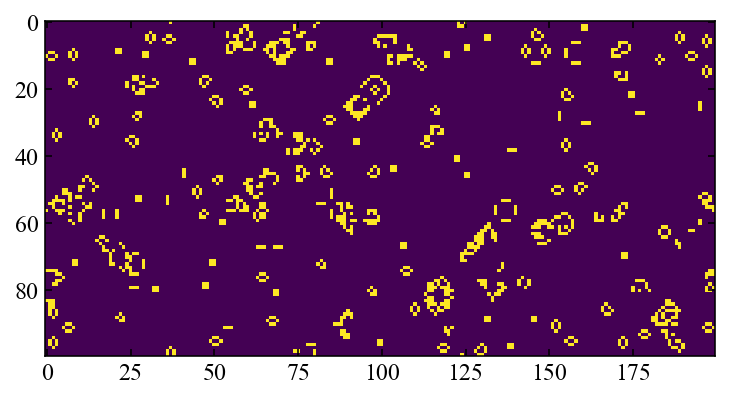

In [ ]:
#当所有细胞状态不变时结束
#可能存在棋盘一直周期性变化，此时如果需要结束可手动结束
while not(cell_temp==cell).all():
    #通过读取cell矩阵，不断判断每一个单元格是存活还是死亡，将判断结果保存在cell_temp中，最终再复制给cell矩阵
    cell = copy.deepcopy(cell_temp)
    #显示每一轮的图像
    plt.imshow(cell)
    plt.pause(0.2)
    display.clear_output(wait=True)
    #两重循环遍历整个矩阵，判断每个细胞下一个状态是生存还是死亡
    for i in range(0,length):
        for j in range(0,width):
            '''
            count保存一个细胞周围8个方格内有几个存活的细胞，注意这两将上下边界和左右边界连接起来进行判断，
            如对于8*8的棋盘,[0,0]与[0,7]和[7,0]在逻辑上相邻
            '''
            count = cell[(i-1)%length][j] + cell[(i+1)%length][j] + cell[i][(j-1)%width] + cell[i][(j+1)%width] + cell[(i+1)%length][(j+1)%width] + cell[(i-1)%length][(j+1)%width] + cell[(i+1)%length][(j-1)%width] + cell[(i-1)%length][(j-1)%width]
            #如果一个单元格是死亡，且周围是三个单元格则存活，否则保持死亡
            if(cell[i][j] == 0 and count != 3):
                continue
            if(cell[i][j] == 0 and count == 3):
                cell_temp[i][j] = 1
                continue
            #如果一个存活的单元格周围有2或3个单元格存活则该单元格继续存活，否则死亡
            if(count == 2 or count ==3):
                continue
            cell_temp[i][j] = 0
